In [20]:
import cv2
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc
from pdb import set_trace
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pdb import set_trace

In [206]:
def GenerateData():
    width = 64
    height = 64
    FPS = 1000
    seconds = 10
    radius = 1
    paint_h = int(height/2)
    VideoData = []

    #Design the testing data
    for paint_x in range(-radius, width+radius+1, 1):
        frame = 255*np.ones( 
                       (height, width), 
                                  dtype=np.double)
        cv2.circle(frame, (paint_x, paint_h), radius, (0, 0), -1)
        VideoData.append(frame)

    VideoTrain = np.stack(VideoData, axis=0)

    for paint_x in range(-radius, width+radius+1, 2):
        frame = 255*np.ones( 
                       (height, width), 
                                  dtype=np.double)
        cv2.circle(frame, (paint_x, paint_h), radius, (0, 0), -1)
        VideoData.append(frame)

    VideoTest = np.stack(VideoData, axis=0)

    return torch.tensor(VideoTrain,dtype=torch.float), torch.tensor(VideoTest,dtype=torch.float)

67
101
5
tensor([0., 0., 0., 0., 0.])


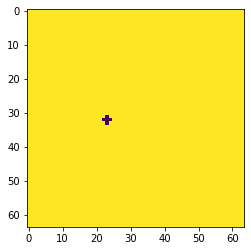

In [266]:
VideoTrain, VideoTest = GenerateData()
index = 50
print(VideoTrain.shape[0])
print(VideoTest.shape[0])
print(len(VideoTrain[index,VideoTrain[index]==0]))
print(VideoTrain[index,VideoTrain[index,:,:]==0])
plt.imshow(VideoTrain[24,:,:])
plt.show()

In [275]:
#Define the architecture for the RNN
class RNN(nn.Module):
    def __init__(self, dt, height, width, frames):
        super(RNN, self).__init__()
        self.dt = dt
        self.height = height
        self.width = width
        self.W = nn.Parameter(255*torch.ones(frames, height, width))
        self.b = nn.Parameter(255*torch.ones(frames, height, width))
        
    def forward(self,X):
        # Make the dynamics here
        # Extract the image of the object
        # Define the parameters for the new position
        # Predict the object there
        frames = X.shape[0]-1
        output = []
        for i in range(frames):
            #Extract the indices of the object
            param = torch.matmul(self.W[i], X[i]) + self.b[i]
            newframe = X[i] + self.dt*param
            output.append(newframe)
           
        return torch.stack(output, axis=0)

In [278]:
rnn = RNN(1/24, 64,64, 66)
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.1)
n_epochs = 10000

In [279]:
Truedat = VideoTrain[1:]
delay = 5
for i in range(n_epochs):
    output = rnn(VideoTrain)
    loss = torch.mean(torch.square(output - Truedat))
    if (i%delay == 0):
        print(loss.item())
    loss.backward()
    optimizer.step()

30001297408.0
29887207424.0
29770070016.0
29645907968.0
29514717184.0
29377142784.0
29233731584.0
29085372416.0
28932540416.0
28776138752.0
28616599552.0
28454447104.0
28290174976.0
28124200960.0
27956756480.0
27788197888.0
27618686976.0
27448467456.0
27277721600.0
27106576384.0
26935042048.0
26763442176.0
26591647744.0
26419875840.0
26248210432.0
26076579840.0
25905158144.0
25733853184.0
25562939392.0
25392244736.0
25221894144.0
25051897856.0
24882288640.0
24713078784.0
24544342016.0
24375996416.0
24208121856.0
24040767488.0
23873939456.0
23707588608.0
23541766144.0
23376492544.0
23211730944.0
23047604224.0
22883975168.0
22721003520.0
22558507008.0
22396702720.0
22235439104.0
22074818560.0
21914812416.0
21755402240.0
21596585984.0
21438400512.0
21280870400.0
21123979264.0
20967712768.0
20812109824.0
20657115136.0
20502771712.0
20349024256.0
20195995648.0
20043626496.0
19891857408.0
19740745728.0
19590342656.0
19440553984.0
19291408384.0
19142938624.0
18995175424.0
18847993856.0
187015

KeyboardInterrupt: 

[[-67521.57 -67521.57 -67521.57 ... -67521.57 -67521.57 -67521.57]
 [-67521.57 -67521.57 -67521.57 ... -67521.57 -67521.57 -67521.57]
 [-67521.57 -67521.57 -67521.57 ... -67521.57 -67521.57 -67521.57]
 ...
 [-67521.61 -67521.61 -67521.61 ... -67521.61 -67521.61 -67521.61]
 [-67521.61 -67521.61 -67521.61 ... -67521.61 -67521.61 -67521.61]
 [-67521.61 -67521.61 -67521.61 ... -67521.61 -67521.61 -67521.61]]


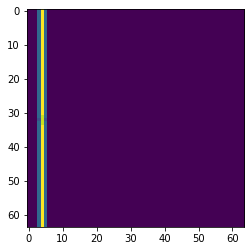

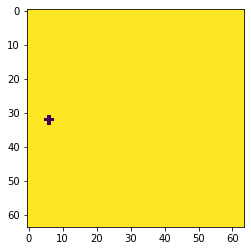

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [286]:
print(output.detach().numpy()[5])
plt.imshow(output.detach().numpy()[5])
plt.show()
plt.imshow(Truedat.detach().numpy()[6])
plt.show()
print(Truedat.detach().numpy()[6])